/tmp/ipykernel_94824/3495071605.py:27: RuntimeWarning: overflow encountered in double_scalars
  S[t+1] = S[t] + dt * (Lambda - beta * S[t] * I[t] - mu_S * S[t] + r * I[t] + Sigma_S)
/tmp/ipykernel_94824/3495071605.py:28: RuntimeWarning: overflow encountered in double_scalars
  I[t+1] = I[t] + dt * (beta * S[t] * I[t] - (mu_I + r) * I[t] + Sigma_I)
/tmp/ipykernel_94824/3495071605.py:29: RuntimeWarning: overflow encountered in double_scalars
  V[t] = S[t] + I[t] + alpha * I[t]**2
/tmp/ipykernel_94824/3495071605.py:27: RuntimeWarning: invalid value encountered in double_scalars
  S[t+1] = S[t] + dt * (Lambda - beta * S[t] * I[t] - mu_S * S[t] + r * I[t] + Sigma_S)
/tmp/ipykernel_94824/3495071605.py:28: RuntimeWarning: invalid value encountered in double_scalars
  I[t+1] = I[t] + dt * (beta * S[t] * I[t] - (mu_I + r) * I[t] + Sigma_I)
/tmp/ipykernel_94824/3495071605.py:29: RuntimeWarning: invalid value encountered in double_scalars
  V[t] = S[t] + I[t] + alpha * I[t]**2


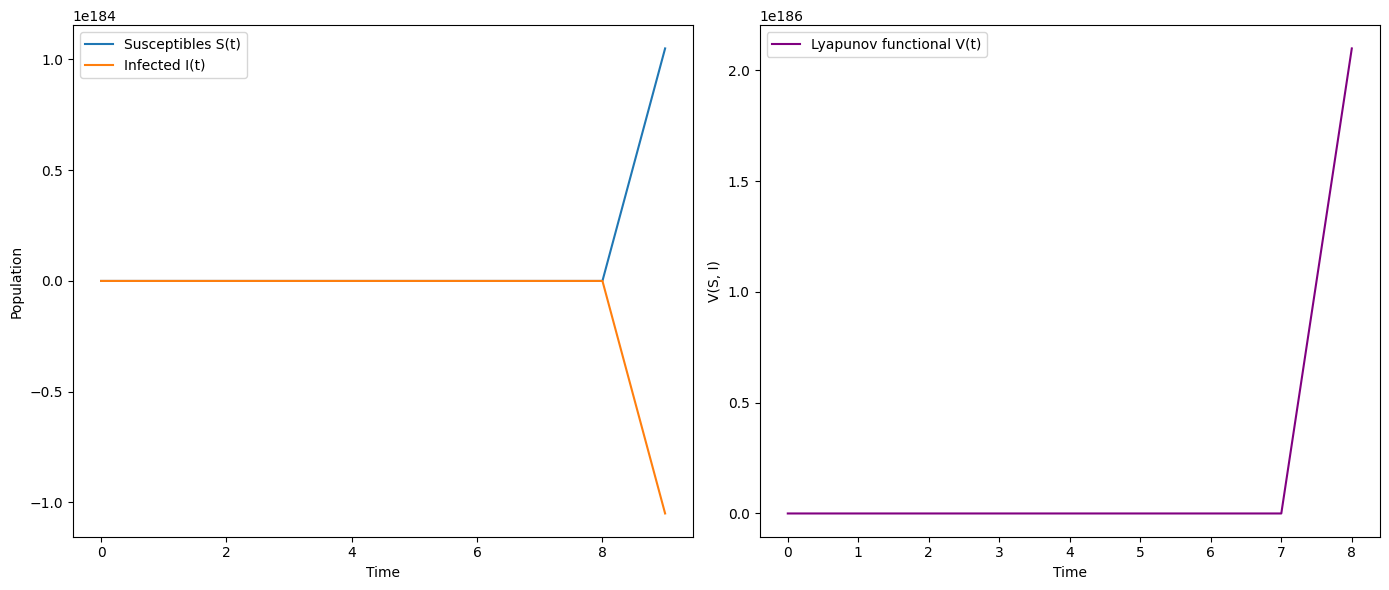

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Lambda = 1.0  # Birth rate or influx of susceptibles
beta = 0.05   # Transmission rate
mu_S = 0.02   # Recovery rate of susceptibles
mu_I = 0.01   # Recovery rate of infected
r = 0.01      # Rate at which infected individuals become susceptible again
Sigma_S = Sigma_I = 0.01  # External source of S and I
alpha = 10.0  # Coefficient for penalization term
D_S = D_I = 0  # Ignoring spatial component for simplicity

# Time steps
T = 100
dt = 1

# Initial conditions
S = np.zeros(T)
I = np.zeros(T)
V = np.zeros(T)  # For the Lyapunov functional

S[0] = 50
I[0] = 50

for t in range(T-1):
    S[t+1] = S[t] + dt * (Lambda - beta * S[t] * I[t] - mu_S * S[t] + r * I[t] + Sigma_S)
    I[t+1] = I[t] + dt * (beta * S[t] * I[t] - (mu_I + r) * I[t] + Sigma_I)
    V[t] = S[t] + I[t] + alpha * I[t]**2

V[-1] = S[-1] + I[-1] + alpha * I[-1]**2  # Compute the last value of V

# Plot the results
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(np.arange(T), S, label='Susceptibles S(t)')
plt.plot(np.arange(T), I, label='Infected I(t)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.arange(T), V, label='Lyapunov functional V(t)', color='purple')
plt.xlabel('Time')
plt.ylabel('V(S, I)')
plt.legend()

plt.tight_layout()
plt.show()

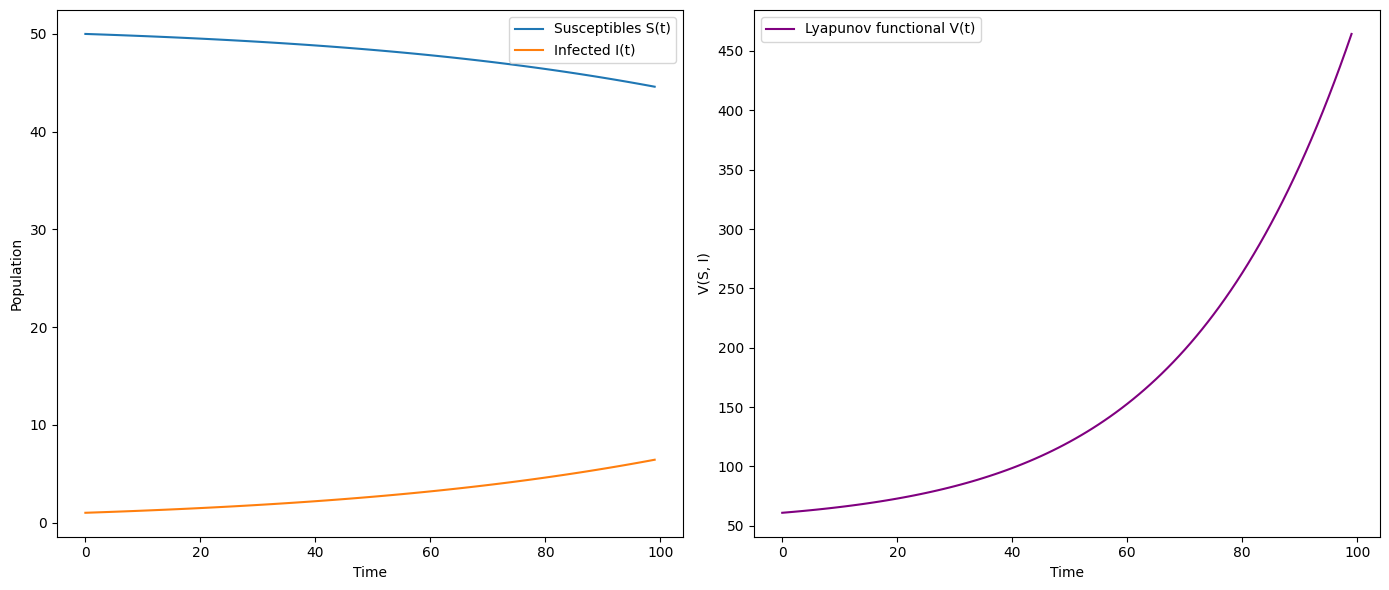

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Adjusted parameters (if needed, based on your specific model requirements)
Lambda, beta, mu_S, mu_I, r, Sigma_S, Sigma_I, alpha = 1, 0.05, 0.02, 0.01, 0.5, 0.01, 0.01, 10.0
D_S = D_I = 0  # Still ignoring spatial components

T = 100
dt = 0.01  # Smaller time step might help

S = np.zeros(T)
I = np.zeros(T)
V = np.zeros(T)

S[0], I[0] = 50, 1  # Starting with fewer infected individuals

for t in range(T-1):
    temp_S = S[t] + dt * (Lambda - beta * S[t] * I[t] - mu_S * S[t] + r * I[t] + Sigma_S)
    temp_I = I[t] + dt * (beta * S[t] * I[t] - (mu_I + r) * I[t] + Sigma_I)
    
    # Simple constraints to prevent overflow
    S[t+1] = np.minimum(temp_S, 1e18)  # Using a high cap for S and I
    I[t+1] = np.minimum(temp_I, 1e18)
    
    # Check and cap to avoid overflow in the computation of V
    V[t] = np.minimum(S[t] + I[t] + alpha * I[t]**2, 1e18)

V[-1] = S[-1] + I[-1] + alpha * I[-1]**2

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(np.arange(T), S, label='Susceptibles S(t)')
plt.plot(np.arange(T), I, label='Infected I(t)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.arange(T), V, label='Lyapunov functional V(t)', color='purple')
plt.xlabel('Time')
plt.ylabel('V(S, I)')
plt.legend()

plt.tight_layout()
plt.show()

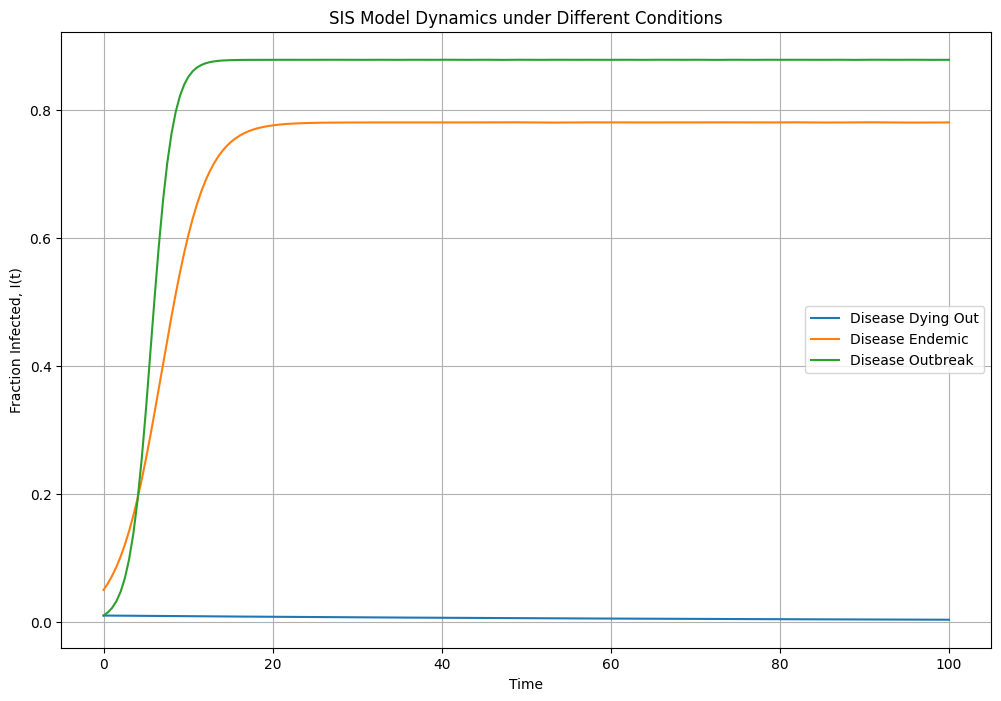

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Defining the SIS model
def SIS_model(t, y, beta, gamma, mu, Lambda):
    """
    :param t: time
    :param y: A list where y[0] = S and y[1] = I.
    :param beta: Contact rate that leads to new infections.
    :param gamma: Rate at which infected recover and become susceptible again.
    :param mu: Natural mortality rate (assuming mu_S = mu_I = mu for simplification).
    :param Lambda: Rate at which new susceptibles are introduced into the population.
    :return: Derivatives of S and I.
    """
    S, I = y
    dSdt = Lambda - beta*S*I - mu*S + gamma*I
    dIdt = beta*S*I - (gamma + mu)*I
    return [dSdt, dIdt]

# Simulation parameters
t_span = (0, 100)  # Time from 0 to 100 units
t_eval = np.linspace(*t_span, 200)  # Evaluate the solution at 200 points in time

# Conditions and parameters for different scenarios
conditions = {
    "Disease Dying Out": {"beta": 0.1, "gamma": 0.1, "mu": 0.01, "Lambda": 0.01, "initial": [0.99, 0.01]},
    "Disease Endemic": {"beta": 0.5, "gamma": 0.1, "mu": 0.01, "Lambda": 0.01, "initial": [0.95, 0.05]},
    "Disease Outbreak": {"beta": 0.9, "gamma": 0.1, "mu": 0.01, "Lambda": 0.01, "initial": [0.99, 0.01]}
}

# Solving and plotting
plt.figure(figsize=(12, 8))

for scenario, params in conditions.items():
    sol = solve_ivp(SIS_model, t_span, params["initial"],
                    args=(params["beta"], params["gamma"], params["mu"], params["Lambda"]),
                    t_eval=t_eval, method='RK45')
    
    plt.plot(sol.t, sol.y[1], label=scenario)

plt.title('SIS Model Dynamics under Different Conditions')
plt.xlabel('Time')
plt.ylabel('Fraction Infected, I(t)')
plt.legend()
plt.grid(True)
plt.show()

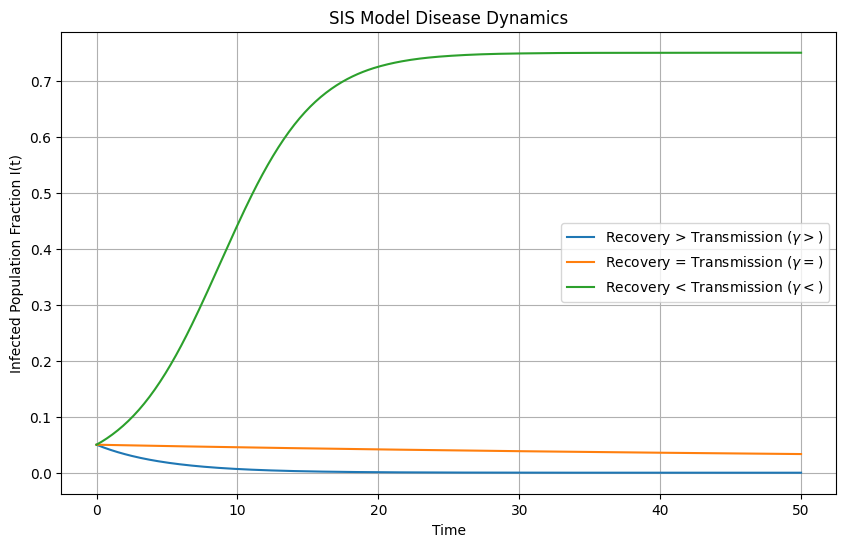

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# SIS model definition
def SIS_model(t, y, beta, gamma):
    S, I = y
    dSdt = -beta * S * I + gamma * I
    dIdt = beta * S * I - gamma * I
    return [dSdt, dIdt]

# Time span for the simulation
t_span = [0, 50]
t_points = np.linspace(*t_span, 400)

# Initial population (assuming total population is normalized to 1)
initial_conditions = [0.95, 0.05]  # Start with 95% susceptible, 5% infected

# Parameter sets for the scenarios
scenarios = {
    "Recovery > Transmission ($\gamma > \beta$)": {"beta": 0.1, "gamma": 0.3},
    "Recovery = Transmission ($\gamma = \beta$)": {"beta": 0.2, "gamma": 0.2},
    "Recovery < Transmission ($\gamma < \beta$)": {"beta": 0.4, "gamma": 0.1},
}

# Plotting
plt.figure(figsize=(10, 6))

for label, params in scenarios.items():
    # Integrate SIS model ODEs
    result = solve_ivp(SIS_model, t_span, initial_conditions, args=(params["beta"], params["gamma"]),
                       dense_output=True)
    t_eval = t_points
    I = result.sol(t_eval)[1]  # Get the infected population fraction over time
    
    # Plot
    plt.plot(t_eval, I, label=label)

plt.title('SIS Model Disease Dynamics')
plt.xlabel('Time')
plt.ylabel('Infected Population Fraction I(t)')
plt.legend()
plt.grid(True)
plt.show()

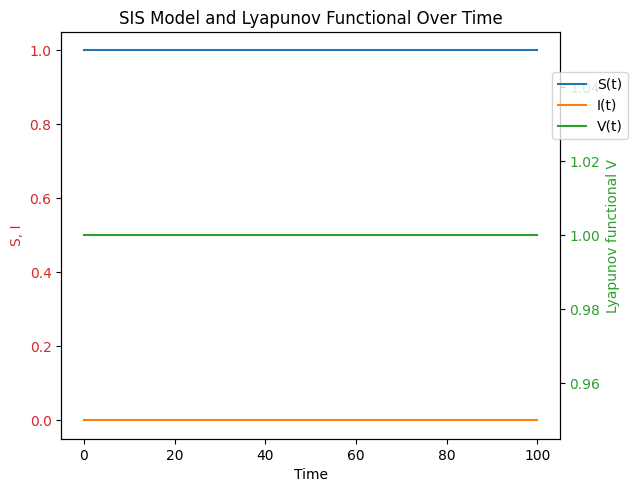

In [9]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the SIS model dynamics
def SIS_dynamics(t, y, beta, gamma, mu_S, Lambda):
    """
    Dynamics of the SIS model.
    :param y: Array containing the susceptible (S) and infected (I) fractions.
    :param beta: Transmission rate.
    :param gamma: Recovery rate.
    :param mu_S: Natural death rate of susceptibles.
    :param Lambda: Rate of new susceptibles entering the population.
    """
    S, I = y
    dSdt = Lambda - beta * S * I - mu_S * S + gamma * I
    dIdt = beta * S * I - (gamma + mu_S) * I  # Assuming mu_I = mu_S for simplification
    return [dSdt, dIdt]

# Lyapunov functional
def Lyapunov_functional(S, I, a, b):
    """
    Computes the Lyapunov functional value given S and I.
    """
    return a * S + b * I

# Parameters
beta = 0.3  # Infection rate
gamma = 0.1  # Recovery rate
mu_S = 0.02  # Natural death rate
Lambda = 0.02  # Rate of new susceptibles
a, b = 1, 1  # Coefficients for the Lyapunov functional

# Initial conditions
S0, I0 = 0.9, 0.1  # 90% susceptible, 10% infected at t=0

# Time span
t_span = [0, 100]
t_eval = np.linspace(*t_span, 400)  # Evaluate at these points

# Solve the ODE
sol = solve_ivp(SIS_dynamics, t_span, [S0, I0], args=(beta, gamma, mu_S, Lambda), t_eval=t_eval, method='RK45')

# Calculate the Lyapunov functional over time
V = [Lyapunov_functional(S, I, a, b) for S, I in zip(sol.y[0], sol.y[1])]

# Plotting
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('S, I', color=color)
ax1.plot(sol.t, sol.y[0], label='S(t)', color='tab:blue')
ax1.plot(sol.t, sol.y[1], label='I(t)', color='tab:orange')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Lyapunov functional V', color=color)
ax2.plot(sol.t, V, label='V(t)', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc="upper right", bbox_to_anchor=(1,0.9))
plt.title('SIS Model and Lyapunov Functional Over Time')
plt.show()

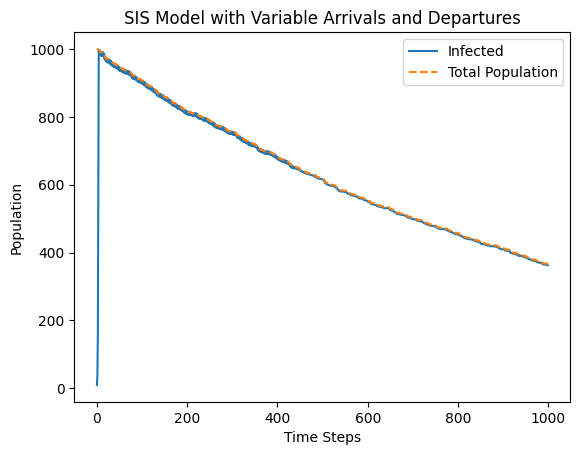

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
beta = 0.03  # Infection rate
gamma = 0.1  # Recovery rate
lambda_arrival = 0.01  # Rate of arrival
mu_departure = 0.01  # Rate of departure
p_infection = 0.05  # Probability of arriving individuals being infected
sigma_square = 0.02  # Variance of infection probability for arrivals

# Initial Conditions
I_initial = 10  # Initial number of infected individuals
N_initial = 1000  # Initial total population
time_steps = 1000  # Number of time steps for the simulation
dt = 0.1  # Delta t - time step size

# Arrays to store simulation results
I = np.zeros(time_steps)
N = np.zeros(time_steps)
I[0] = I_initial
N[0] = N_initial

# Simulation (Euler method)
for t in range(1, time_steps):
    S = N[t-1] - I[t-1]  # Susceptible individuals
    new_infections = beta * S * I[t-1] * dt
    recoveries = gamma * I[t-1] * dt
    arrivals = np.random.poisson(lambda_arrival * dt)
    departures = np.random.poisson(mu_departure * N[t-1] * dt)
    newly_infected_arrivals = np.random.binomial(arrivals, p_infection)
    
    # Update counts
    I[t] = I[t-1] + new_infections - recoveries + newly_infected_arrivals - (I[t-1]/N[t-1])*departures
    N[t] = N[t-1] + arrivals - departures
    # Ensure I doesn't exceed total population
    I[t] = min(I[t], N[t])

# Plot results
plt.plot(I, label='Infected')
plt.plot(N, label='Total Population', linestyle='--')
plt.xlabel('Time Steps')
plt.ylabel('Population')
plt.title('SIS Model with Variable Arrivals and Departures')
plt.legend()
plt.show()

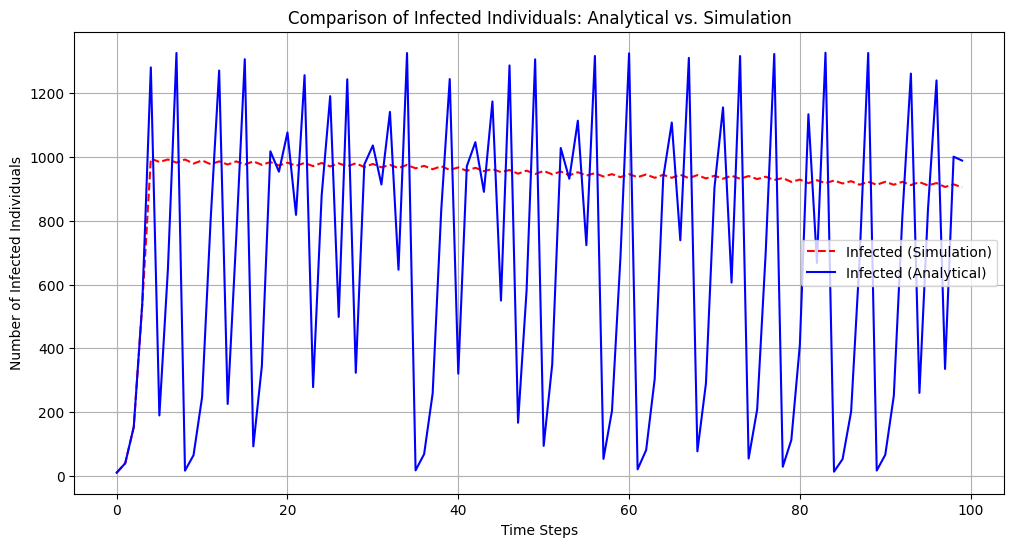

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
beta = 0.03
gamma = 0.1
lambda_arrival = 0.01
mu_departure = 0.01
p_infection = 0.05
time_steps = 100
dt = 0.1

# Initial conditions
I_initial = 10
N_initial = 1000

# Arrays for simulation
I_sim = np.zeros(time_steps)
N_sim = np.zeros(time_steps)
I_sim[0] = I_initial
N_sim[0] = N_initial

# Arrays for "analytical" calculation
I_analytic = np.zeros(time_steps)
I_analytic[0] = I_initial

# Simulation and analytical calculations
for t in range(1, time_steps):
    # Simulation
    S_sim = N_sim[t-1] - I_sim[t-1]
    new_infections_sim = beta * S_sim * I_sim[t-1] * dt
    recoveries_sim = gamma * I_sim[t-1] * dt
    arrivals_sim = np.random.poisson(lambda_arrival * dt)
    departures_sim = np.random.poisson(mu_departure * N_sim[t-1] * dt)
    newly_infected_arrivals_sim = np.random.binomial(arrivals_sim, p_infection)
    
    I_sim[t] = I_sim[t-1] + new_infections_sim - recoveries_sim + newly_infected_arrivals_sim - (I_sim[t-1]/N_sim[t-1])*departures_sim
    N_sim[t] = N_sim[t-1] + arrivals_sim - departures_sim
    I_sim[t] = min(I_sim[t], N_sim[t])

    # "Analytical" expectation (numerically computed)
    expected_infections = beta * (N_initial - I_analytic[t-1]) * I_analytic[t-1] * dt
    expected_recoveries = gamma * I_analytic[t-1] * dt
    expected_infected_arrivals = lambda_arrival * p_infection * dt
    expected_departures = mu_departure * I_analytic[t-1] / N_initial * dt
    
    I_analytic[t] = I_analytic[t-1] + expected_infections - expected_recoveries + expected_infected_arrivals - expected_departures

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(I_sim, label='Infected (Simulation)', linestyle='--', color='red')
plt.plot(I_analytic, label='Infected (Analytical)', linestyle='-', color='blue')
plt.xlabel('Time Steps')
plt.ylabel('Number of Infected Individuals')
plt.title('Comparison of Infected Individuals: Analytical vs. Simulation')
plt.legend()
plt.grid(True)
plt.show()

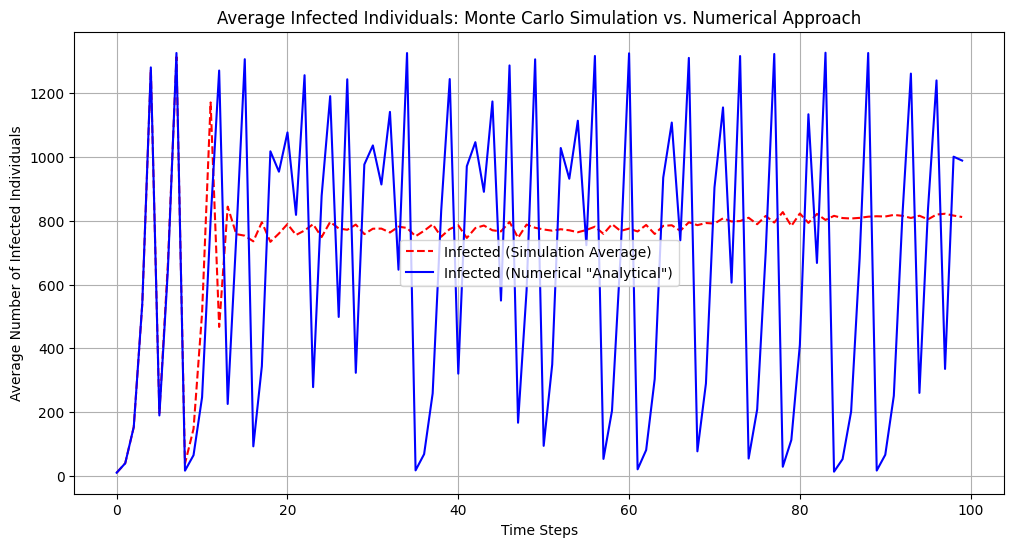

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
beta = 0.03
gamma = 0.1
lambda_arrival = 0.01
mu_departure = 0.01
p_infection = 0.05
time_steps = 100
dt = 0.1
simulations = 1000  # Number of Monte Carlo simulations

# Initial Conditions
I_initial = 10
N_initial = 1000

# Arrays to store results
I_sim_avg = np.zeros(time_steps)
N_sim_avg = np.zeros(time_steps)
I_analytic = np.zeros(time_steps)

I_sim_avg[0] = I_initial
N_sim_avg[0] = N_initial
I_analytic[0] = I_initial

# Monte Carlo Simulation
for sim in range(simulations):
    I_sim = np.zeros(time_steps)
    N_sim = np.zeros(time_steps)
    I_sim[0] = I_initial
    N_sim[0] = N_initial
    
    for t in range(1, time_steps):
        S_sim = N_sim[t-1] - I_sim[t-1]
        new_infections = beta * S_sim * I_sim[t-1] * dt
        recoveries = gamma * I_sim[t-1] * dt
        arrivals = np.random.poisson(lambda_arrival * dt)
        departures = np.random.poisson(mu_departure * N_sim[t-1] * dt)
        newly_infected_arrivals = np.random.binomial(arrivals, p_infection)
        
        I_sim[t] = I_sim[t-1] + new_infections - recoveries + newly_infected_arrivals - (I_sim[t-1]/N_sim[t-1])*departures
        N_sim[t] = N_sim[t-1] + arrivals - departures

    I_sim_avg += I_sim
    N_sim_avg += N_sim

# Averaging over all simulations
I_sim_avg /= simulations
N_sim_avg /= simulations

# Numerical "Analytical" Calculation
for t in range(1, time_steps):
    expected_infections = beta * (N_initial - I_analytic[t-1]) * I_analytic[t-1] * dt
    expected_recoveries = gamma * I_analytic[t-1] * dt
    expected_infected_arrivals = lambda_arrival * p_infection * dt
    expected_departures = mu_departure * I_analytic[t-1] / N_initial * dt
    
    I_analytic[t] = I_analytic[t-1] + expected_infections - expected_recoveries + expected_infected_arrivals - expected_departures

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(I_sim_avg, label='Infected (Simulation Average)', linestyle='--', color='red')
plt.plot(I_analytic, label='Infected (Numerical "Analytical")', linestyle='-', color='blue')
plt.xlabel('Time Steps')
plt.ylabel('Average Number of Infected Individuals')
plt.title('Average Infected Individuals: Monte Carlo Simulation vs. Numerical Approach')
plt.legend()
plt.grid(True)
plt.show()

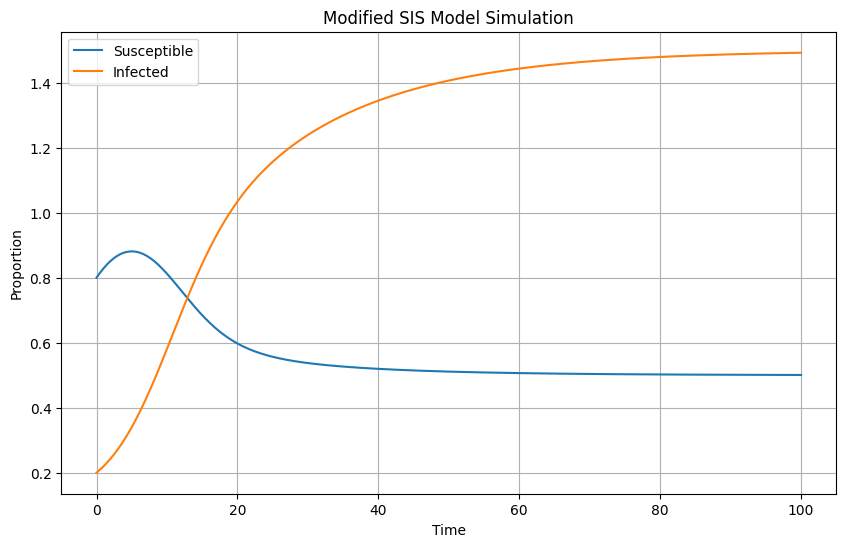

In [14]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the modified SIS model
def sis_model(y, t, Lambda, beta, mu_S, mu_I, gamma):
    S, I = y
    dSdt = Lambda - beta * S * I - mu_S * S + gamma * I
    dIdt = beta * S * I - (gamma + mu_I) * I
    return [dSdt, dIdt]

# Parameters
Lambda = 0.1  # Rate of arrival of new susceptibles
beta = 0.3    # Infection rate
mu_S = 0.05   # Natural mortality rate of susceptibles
mu_I = 0.05   # Natural mortality rate of infected individuals
gamma = 0.1   # Rate of recovery and return to susceptible

# Initial conditions
S0 = 0.8      # Initial proportion of susceptibles
I0 = 0.2      # Initial proportion of infected

# Time vector
t = np.linspace(0, 100, 1000)

# Solve the differential equations
sol = odeint(sis_model, [S0, I0], t, args=(Lambda, beta, mu_S, mu_I, gamma))
S, I = sol[:, 0], sol[:, 1]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.xlabel('Time')
plt.ylabel('Proportion')
plt.title('Modified SIS Model Simulation')
plt.legend()
plt.grid(True)
plt.show()


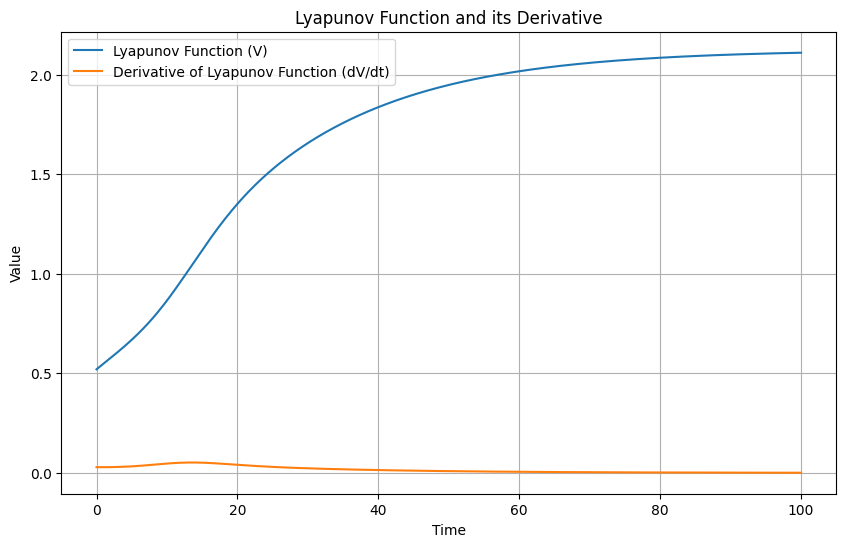

In [15]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the modified SIS model
def sis_model(y, t, Lambda, beta, mu_S, mu_I, gamma):
    S, I = y
    dSdt = Lambda - beta * S * I - mu_S * S + gamma * I
    dIdt = beta * S * I - (gamma + mu_I) * I
    return [dSdt, dIdt]

# Define the Lyapunov function and its derivative
def lyapunov_function(S, I, a, b, c):
    return a * S + b * I + c * I**2

def lyapunov_derivative(y, t, Lambda, beta, mu_S, mu_I, gamma, a, b, c):
    S, I = y
    dSdt = Lambda - beta * S * I - mu_S * S + gamma * I
    dIdt = beta * S * I - (gamma + mu_I) * I
    dVdt = a * dSdt + b * dIdt + 2 * c * I * dIdt
    return dVdt

# Parameters
Lambda = 0.1  # Rate of arrival of new susceptibles
beta = 0.3    # Infection rate
mu_S = 0.05   # Natural mortality rate of susceptibles
mu_I = 0.05   # Natural mortality rate of infected individuals
gamma = 0.1   # Rate of recovery and return to susceptible

# Initial conditions
S0 = 0.8      # Initial proportion of susceptibles
I0 = 0.2      # Initial proportion of infected

# Lyapunov function parameters
a = 0.5
b = 0.5
c = 0.5

# Time vector
t = np.linspace(0, 100, 1000)

# Solve the differential equations
sol = odeint(sis_model, [S0, I0], t, args=(Lambda, beta, mu_S, mu_I, gamma))

# Compute the Lyapunov function and its derivative
V = lyapunov_function(sol[:, 0], sol[:, 1], a, b, c)
dVdt = lyapunov_derivative(sol.T, t, Lambda, beta, mu_S, mu_I, gamma, a, b, c)

# Plot the Lyapunov function and its derivative
plt.figure(figsize=(10, 6))
plt.plot(t, V, label='Lyapunov Function (V)')
plt.plot(t, dVdt, label='Derivative of Lyapunov Function (dV/dt)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Lyapunov Function and its Derivative')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# SIS model parameters
Lambda = 0.1  # Rate of introduction of susceptibles
beta = 0.3    # Effective contact rate leading to new infections
mu_S = 0.1    # Natural mortality rate for Susceptible individuals
mu_I = 0.1    # Natural mortality rate for Infected individuals
gamma = 0.2   # Recovery rate

# Define the derivative function for the SIS model
def sis_derivatives(t, y):
    S, I = y
    dSdt = Lambda - beta * S * I - mu_S * S + gamma * I
    dIdt = beta * S * I - (gamma + mu_I) * I
    return [dSdt, dIdt]

# Initial conditions
# Initial conditions
S0 = 0.8  # Initial susceptible population
I0 = 0.2  # Initial infected population
y0 = [float(S0), float(I0)]  # Ensure y0 is a list of floats

# Time points
t = np.linspace(0, 100, 1000)

# Integrate the SIS model equations
sol = odeint(sis_derivatives, y0, t)

# Extracting S and I values
S = sol[:, 0]
I = sol[:, 1]

# Compute the Lyapunov function
a = 1  # Coefficient for S
b = 1  # Coefficient for I
c = 1  # Coefficient for I^2
V = a * S + b * I + c * (I ** 2)

# Compute the derivative of the Lyapunov function
dVdt = a * (Lambda - beta * S * I - mu_S * S + gamma * I) + b * (beta * S * I - (gamma + mu_I) * I) + 2 * c * I * (beta * S * I - (gamma + mu_I) * I)

# Plotting
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, S, 'b', label='Susceptible')
plt.plot(t, I, 'r', label='Infected')
plt.title('SIS Model Simulation')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, V, 'g', label='Lyapunov Function (V)')
plt.plot(t, dVdt, 'm', label='dV/dt')
plt.title('Lyapunov Function and its Derivative')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()


TypeError: cannot unpack non-iterable float object

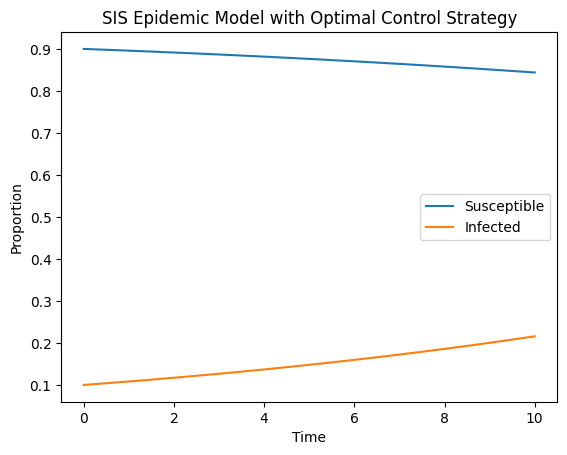

In [19]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

# Define parameters
beta = 0.1  # infection rate
gamma = 0.05  # recovery rate
T = 10  # simulation time
alpha = 0.1  # parameter controlling the cost of control strategy

# Define SIS model dynamics
def sis_model(t, y, u):
    S, I = y
    dSdt = -beta * S * I + gamma * I
    dIdt = beta * S * I - gamma * I * u
    return [dSdt, dIdt]

# Define objective function to minimize
def objective_function(u):
    sol = solve_ivp(lambda t, y: sis_model(t, y, u), [0, T], [0.9, 0.1], t_eval=np.linspace(0, T, 100))
    I = sol.y[1]
    return np.trapz(I + alpha * u**2, sol.t)

# Find optimal control strategy
initial_guess = 0.5  # initial guess for control strategy
result = minimize(objective_function, initial_guess, bounds=[(0, 1)], method='SLSQP')
optimal_control_strategy = result.x[0]

# Simulate SIS model with optimal control strategy
sol = solve_ivp(lambda t, y: sis_model(t, y, optimal_control_strategy), [0, T], [0.9, 0.1], t_eval=np.linspace(0, T, 100))

# Plot results
import matplotlib.pyplot as plt
plt.plot(sol.t, sol.y[0], label='Susceptible')
plt.plot(sol.t, sol.y[1], label='Infected')
plt.xlabel('Time')
plt.ylabel('Proportion')
plt.title('SIS Epidemic Model with Optimal Control Strategy')
plt.legend()
plt.show()